# Main

In [44]:
from utils import *

In [75]:
alpha = 0.05
T_burnin = 120
lr = 0.01
Csat = 2.5
KI = 1.0
ahead = 1
seasonal_period = 7
n_series=3
n_points=365*2

In [76]:
df = generar_datos(n_series=n_series, n_points=n_points, seed=123, start_date="2023-01-01")
df = assign_data_sets(df, date_col="FECHA", future_col="FUTURE", calib_ratio=0.4)


In [77]:
df_pdi, logs = apply_pdi_with_calibration_with_diagnostics(
    df=df,
    key_col="KEY",
    date_col="FECHA",
    value_col="Y",
    pred_col="YHATFIN",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    lr=lr,
    T_burnin=T_burnin,
    Csat=Csat,
    KI=KI,
    ahead=ahead,
    seasonal_period=seasonal_period,
    set_col="SET"
)

  0%|          | 0/306 [00:00<?, ?it/s]c:\Users\julian.quintero\FCPDIHC\PDIHC\.venv\Lib\site-packages\statsmodels\tsa\forecasting\theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
 43%|████▎     | 133/306 [00:00<00:00, 1284.98it/s]

⚠️ Cobertura baja en el paso 0: 0.0
⚠️ Cobertura baja en el paso 1: 0.0
⚠️ Cobertura baja en el paso 2: 0.0
⚠️ Cobertura baja en el paso 4: 0.0
⚠️ Cobertura baja en el paso 5: 0.0
⚠️ Cobertura baja en el paso 6: 0.0
⚠️ Cobertura baja en el paso 8: 0.0
⚠️ Cobertura baja en el paso 10: 0.0
⚠️ Cobertura baja en el paso 15: 0.0
⚠️ Cobertura baja en el paso 16: 0.0
⚠️ Cobertura baja en el paso 17: 0.0
⚠️ Cobertura baja en el paso 18: 0.0
⚠️ Cobertura baja en el paso 19: 0.0
⚠️ Cobertura baja en el paso 20: 0.0
⚠️ Cobertura baja en el paso 21: 0.0
⚠️ Cobertura baja en el paso 22: 0.0
⚠️ Cobertura baja en el paso 23: 0.0
⚠️ Cobertura baja en el paso 24: 0.0
⚠️ Cobertura baja en el paso 25: 0.0
⚠️ Cobertura baja en el paso 27: 0.0
⚠️ Cobertura baja en el paso 28: 0.0
⚠️ Cobertura baja en el paso 29: 0.0
⚠️ Cobertura baja en el paso 30: 0.0
⚠️ Cobertura baja en el paso 31: 0.0
⚠️ Cobertura baja en el paso 32: 0.0
⚠️ Cobertura baja en el paso 33: 0.0
⚠️ Cobertura baja en el paso 34: 0.0
⚠️ Cober

 86%|████████▌ | 262/306 [00:00<00:00, 321.00it/s] 

⚠️ Cobertura baja en el paso 225: 0.0
⚠️ Cobertura baja en el paso 230: 0.0
⚠️ Cobertura baja en el paso 255: 0.0
⚠️ Cobertura baja en el paso 263: 0.0


100%|██████████| 306/306 [00:00<00:00, 314.56it/s]
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:640: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[lower_col] = train[pred_col] - qs_calib
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[upper_col] = train[pred_col] + qs_calib
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

⚠️ Cobertura baja en el paso 275: 0.0
⚠️ Cobertura baja en el paso 286: 0.0


  0%|          | 0/306 [00:00<?, ?it/s]

⚠️ Cobertura baja en el paso 0: 0.0
⚠️ Cobertura baja en el paso 1: 0.0
⚠️ Cobertura baja en el paso 2: 0.0
⚠️ Cobertura baja en el paso 3: 0.0
⚠️ Cobertura baja en el paso 4: 0.0
⚠️ Cobertura baja en el paso 5: 0.0
⚠️ Cobertura baja en el paso 6: 0.0
⚠️ Cobertura baja en el paso 7: 0.0
⚠️ Cobertura baja en el paso 10: 0.0
⚠️ Cobertura baja en el paso 11: 0.0
⚠️ Cobertura baja en el paso 12: 0.0
⚠️ Cobertura baja en el paso 13: 0.0
⚠️ Cobertura baja en el paso 15: 0.0
⚠️ Cobertura baja en el paso 16: 0.0
⚠️ Cobertura baja en el paso 17: 0.0
⚠️ Cobertura baja en el paso 19: 0.0
⚠️ Cobertura baja en el paso 20: 0.0
⚠️ Cobertura baja en el paso 21: 0.0
⚠️ Cobertura baja en el paso 23: 0.0
⚠️ Cobertura baja en el paso 25: 0.0
⚠️ Cobertura baja en el paso 26: 0.0
⚠️ Cobertura baja en el paso 27: 0.0
⚠️ Cobertura baja en el paso 28: 0.0
⚠️ Cobertura baja en el paso 30: 0.0
⚠️ Cobertura baja en el paso 31: 0.0
⚠️ Cobertura baja en el paso 33: 0.0
⚠️ Cobertura baja en el paso 34: 0.0
⚠️ Cobert

c:\Users\julian.quintero\FCPDIHC\PDIHC\.venv\Lib\site-packages\statsmodels\tsa\forecasting\theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
 45%|████▍     | 137/306 [00:00<00:00, 1174.88it/s]

⚠️ Cobertura baja en el paso 59: 0.0
⚠️ Cobertura baja en el paso 60: 0.0
⚠️ Cobertura baja en el paso 62: 0.0
⚠️ Cobertura baja en el paso 66: 0.0
⚠️ Cobertura baja en el paso 68: 0.0
⚠️ Cobertura baja en el paso 69: 0.0
⚠️ Cobertura baja en el paso 72: 0.0
⚠️ Cobertura baja en el paso 74: 0.0
⚠️ Cobertura baja en el paso 77: 0.0
⚠️ Cobertura baja en el paso 86: 0.0
⚠️ Cobertura baja en el paso 92: 0.0
⚠️ Cobertura baja en el paso 93: 0.0
⚠️ Cobertura baja en el paso 94: 0.0
⚠️ Cobertura baja en el paso 97: 0.0
⚠️ Cobertura baja en el paso 98: 0.0
⚠️ Cobertura baja en el paso 101: 0.0
⚠️ Cobertura baja en el paso 105: 0.0
⚠️ Cobertura baja en el paso 111: 0.0
⚠️ Cobertura baja en el paso 120: 0.0
⚠️ Cobertura baja en el paso 129: 0.0
⚠️ Cobertura baja en el paso 135: 0.0
⚠️ Cobertura baja en el paso 150: 0.0
⚠️ Cobertura baja en el paso 164: 0.0
⚠️ Cobertura baja en el paso 168: 0.0
⚠️ Cobertura baja en el paso 186: 0.0


 83%|████████▎ | 255/306 [00:00<00:00, 285.96it/s] 

⚠️ Cobertura baja en el paso 222: 0.0
⚠️ Cobertura baja en el paso 231: 0.0
⚠️ Cobertura baja en el paso 237: 0.0
⚠️ Cobertura baja en el paso 252: 0.0
⚠️ Cobertura baja en el paso 253: 0.0


100%|██████████| 306/306 [00:01<00:00, 282.63it/s]
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:640: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[lower_col] = train[pred_col] - qs_calib
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[upper_col] = train[pred_col] + qs_calib
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

⚠️ Cobertura baja en el paso 280: 0.0
⚠️ Cobertura baja en el paso 286: 0.0
⚠️ Cobertura baja en el paso 299: 0.0
⚠️ Cobertura baja en el paso 303: 0.0


  0%|          | 0/306 [00:00<?, ?it/s]

⚠️ Cobertura baja en el paso 0: 0.0
⚠️ Cobertura baja en el paso 1: 0.0
⚠️ Cobertura baja en el paso 2: 0.0
⚠️ Cobertura baja en el paso 3: 0.0
⚠️ Cobertura baja en el paso 4: 0.0
⚠️ Cobertura baja en el paso 5: 0.0
⚠️ Cobertura baja en el paso 6: 0.0
⚠️ Cobertura baja en el paso 7: 0.0
⚠️ Cobertura baja en el paso 8: 0.0
⚠️ Cobertura baja en el paso 9: 0.0
⚠️ Cobertura baja en el paso 10: 0.0
⚠️ Cobertura baja en el paso 12: 0.0
⚠️ Cobertura baja en el paso 13: 0.0
⚠️ Cobertura baja en el paso 14: 0.0
⚠️ Cobertura baja en el paso 16: 0.0
⚠️ Cobertura baja en el paso 18: 0.0
⚠️ Cobertura baja en el paso 20: 0.0
⚠️ Cobertura baja en el paso 21: 0.0
⚠️ Cobertura baja en el paso 23: 0.0
⚠️ Cobertura baja en el paso 25: 0.0
⚠️ Cobertura baja en el paso 28: 0.0
⚠️ Cobertura baja en el paso 29: 0.0
⚠️ Cobertura baja en el paso 31: 0.0
⚠️ Cobertura baja en el paso 33: 0.0
⚠️ Cobertura baja en el paso 34: 0.0
⚠️ Cobertura baja en el paso 35: 0.0
⚠️ Cobertura baja en el paso 36: 0.0
⚠️ Cobertur

c:\Users\julian.quintero\FCPDIHC\PDIHC\.venv\Lib\site-packages\statsmodels\tsa\forecasting\theta.py:44: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  return DeterministicTerm._extend_index(index, steps)
 42%|████▏     | 130/306 [00:00<00:00, 1235.99it/s]

⚠️ Cobertura baja en el paso 122: 0.0
⚠️ Cobertura baja en el paso 127: 0.0
⚠️ Cobertura baja en el paso 129: 0.0
⚠️ Cobertura baja en el paso 138: 0.0
⚠️ Cobertura baja en el paso 145: 0.0
⚠️ Cobertura baja en el paso 148: 0.0
⚠️ Cobertura baja en el paso 150: 0.0
⚠️ Cobertura baja en el paso 155: 0.0
⚠️ Cobertura baja en el paso 156: 0.0
⚠️ Cobertura baja en el paso 178: 0.0
⚠️ Cobertura baja en el paso 198: 0.0
⚠️ Cobertura baja en el paso 205: 0.0
⚠️ Cobertura baja en el paso 223: 0.0
⚠️ Cobertura baja en el paso 233: 0.0
⚠️ Cobertura baja en el paso 235: 0.0


 83%|████████▎ | 254/306 [00:00<00:00, 291.89it/s] 

⚠️ Cobertura baja en el paso 244: 0.0
⚠️ Cobertura baja en el paso 261: 0.0
⚠️ Cobertura baja en el paso 266: 0.0


100%|██████████| 306/306 [00:01<00:00, 286.27it/s]
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:640: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[lower_col] = train[pred_col] - qs_calib
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[upper_col] = train[pred_col] + qs_calib
c:\Users\julian.quintero\FCPDIHC\PDIHC\utils.py:648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

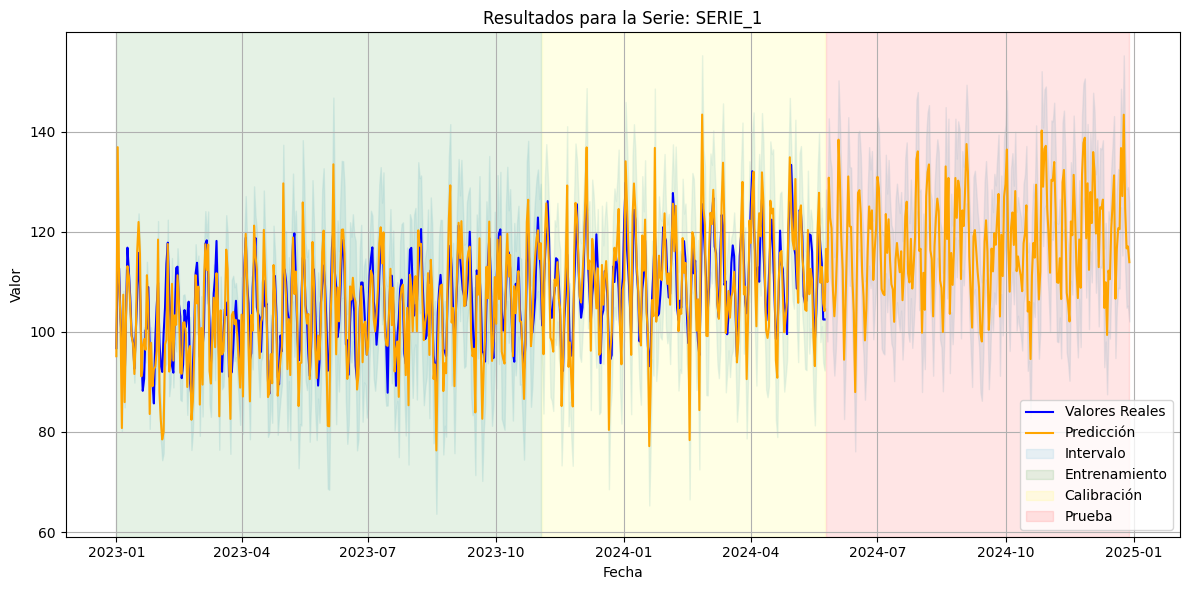

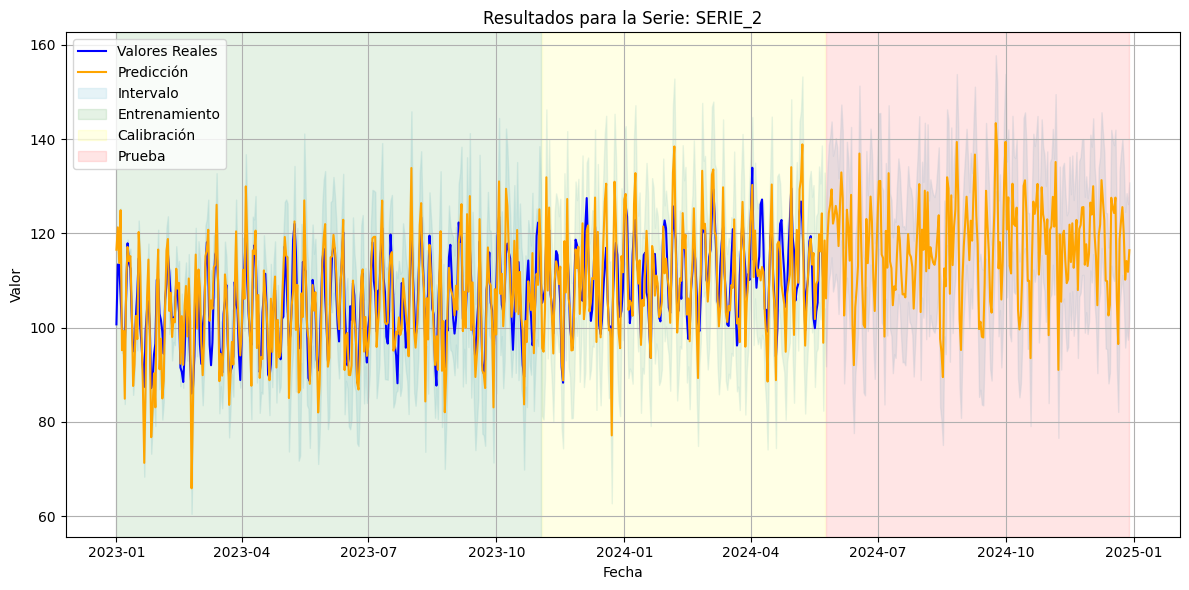

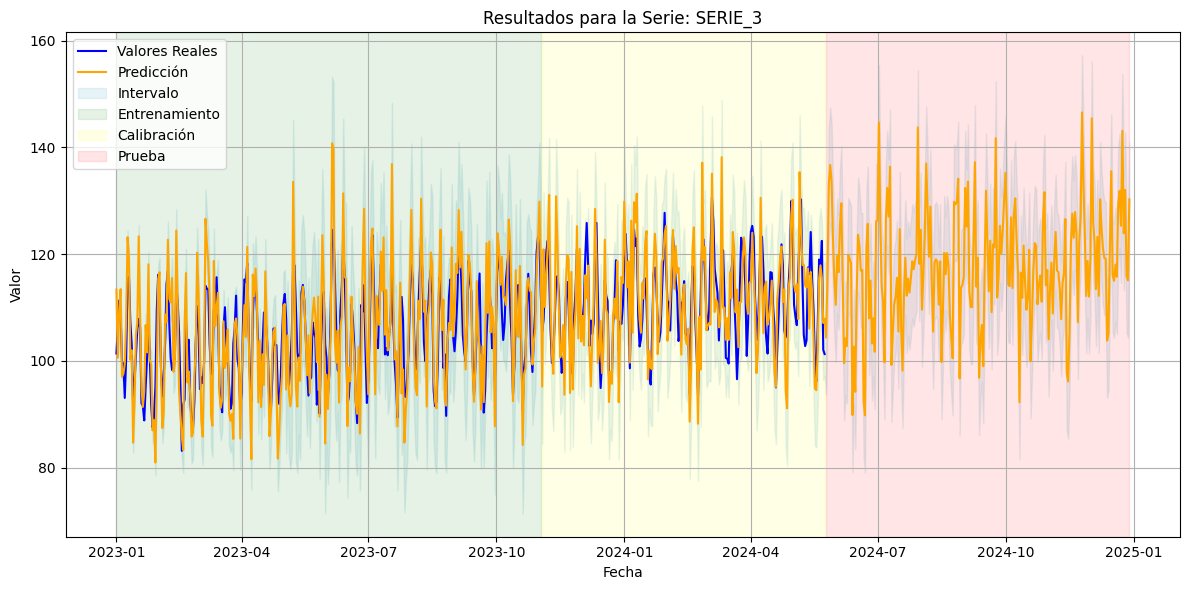

In [78]:
# Bucle para visualizar resultados para todas las series
for i in range(1, n_series + 1):
    key = f"SERIE_{i}"
    plot_series_results_with_sets(df_pdi, key=key)

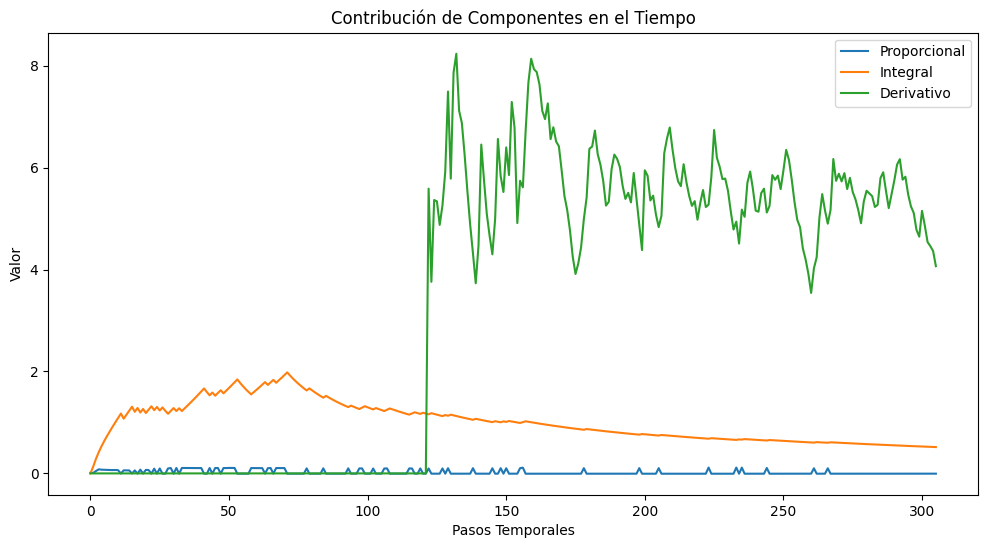

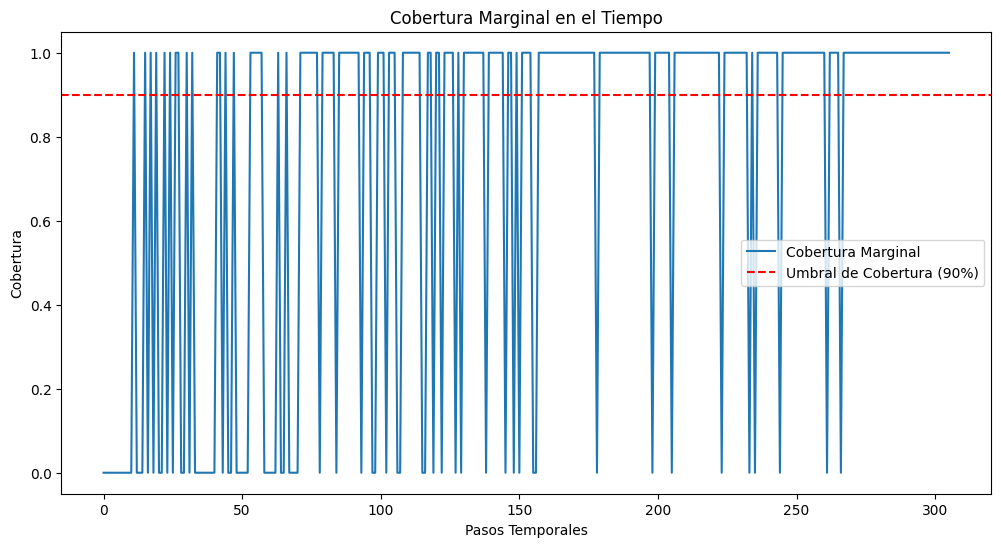

In [79]:
plot_logs(logs)

In [80]:
# Dividir el DataFrame en TRAIN, CALIBRATION y TEST
train_df = df_pdi[df_pdi["SET"] == "TRAIN"]
calib_df = df_pdi[df_pdi["SET"] == "CALIBRATION"]
test_df = df_pdi[df_pdi["SET"] == "TEST"]

# Calcular métricas por serie (KEY) para el conjunto de calibración
calib_metrics_by_key = calculate_metrics(
    calib_df,
    value_col="Y",
    lower_col="YHAT_L",
    upper_col="YHAT_U",
    alpha=alpha,
    condition_col="KEY"
)

# Mostrar resultados
print("Métricas por KEY (Calibración):")
print(calib_metrics_by_key)


Métricas por KEY (Calibración):
     Group  Marginal Coverage  Coverage Deviation  Average Region Size  \
0  SERIE_1           0.906863           -0.043137            23.681306   
1  SERIE_2           0.946078           -0.003922            28.790473   
2  SERIE_3           0.867647           -0.082353            21.411004   

   Winkler Score  
0      33.735599  
1      34.249609  
2      35.666351  
